# Face Recognition with Olivetti Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection

### Load the Dataset

In [2]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [3]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


Reshape the target data

In [4]:
#target_data = target_data.reshape((400, 1,1)) # RESHAPE WRONG
print(f"Target data shape: {target_data.shape}")
print(target_data)
print(data)

Target data shape: (400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 

### Get 6 random people face from the data

[31, 21, 2, 13, 5, 27]


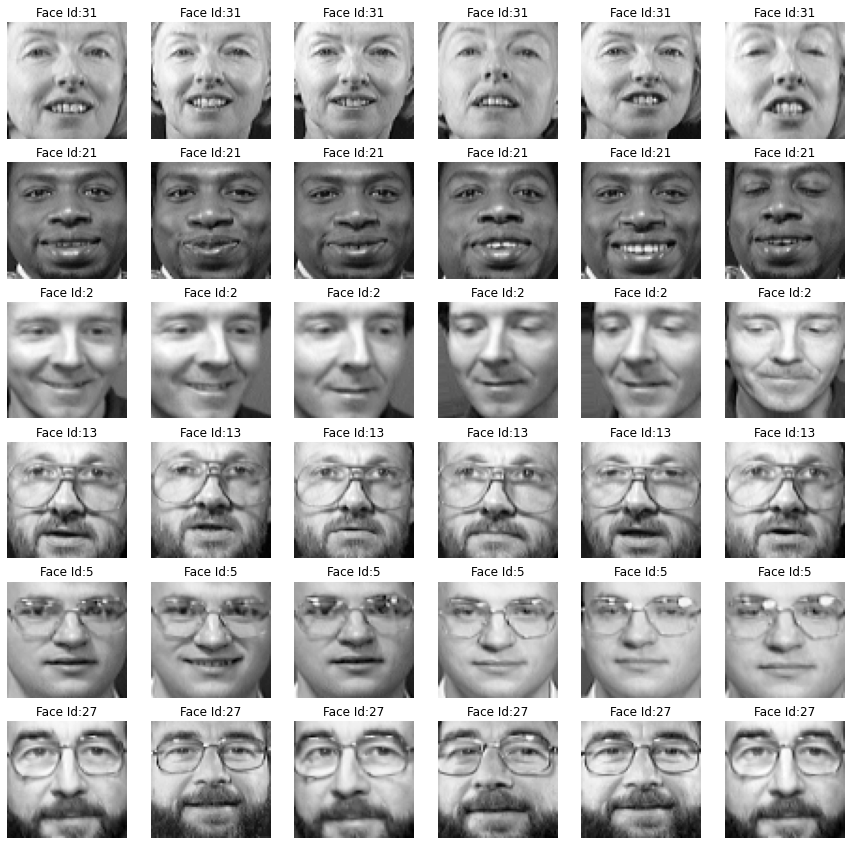

In [5]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)
print(face_id)

'''
face_id = set(face_id)
while len(face_id) < rows:
    face_id.add(random.randint(0, 39))
face_id = sorted(face_id)
print(face_id)
'''

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

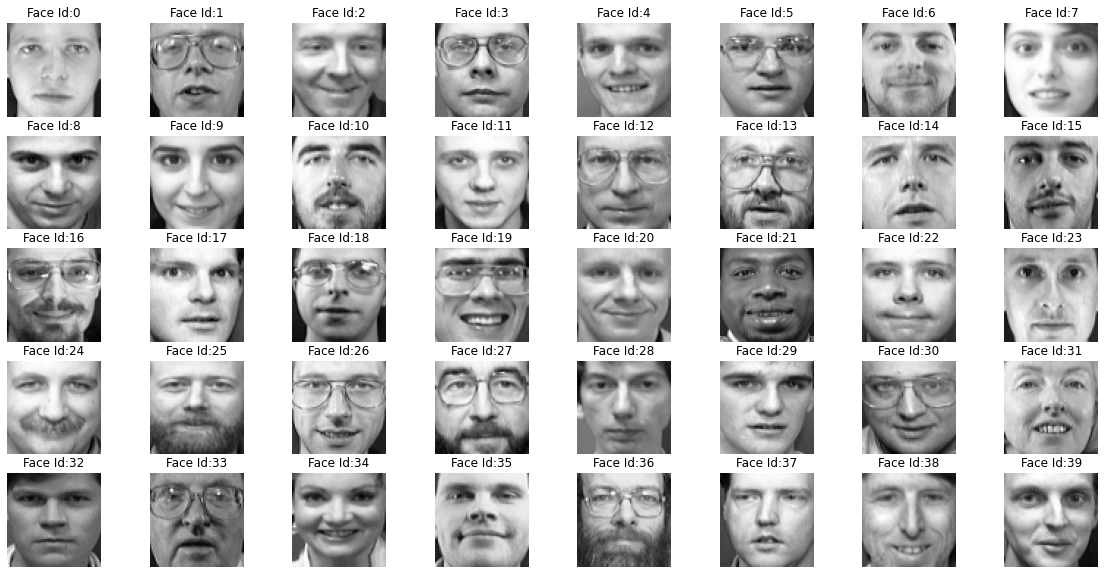

In [6]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Get 6 random people face from the target data

In [7]:
'''
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = random.sample(range(0,40), rows)
print(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")
'''

'\nrows = 6\ncols = 6\n\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\n\nface_id = random.sample(range(0,40), rows)\nprint(face_id)\n\nfor i, face_id in enumerate(face_id):\n    for j in range(cols):\n        image_index=face_id * 10 + j\n        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")\n        ax[i,j].set_title("Face Id:{}".format(face_id))\n        ax[i,j].axis("off")\n'

### Split Data into Train and Test

Convert matrix form (image data) to a vector 

In [8]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


### Normalization

In [10]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

### Distribuiton of the dataset


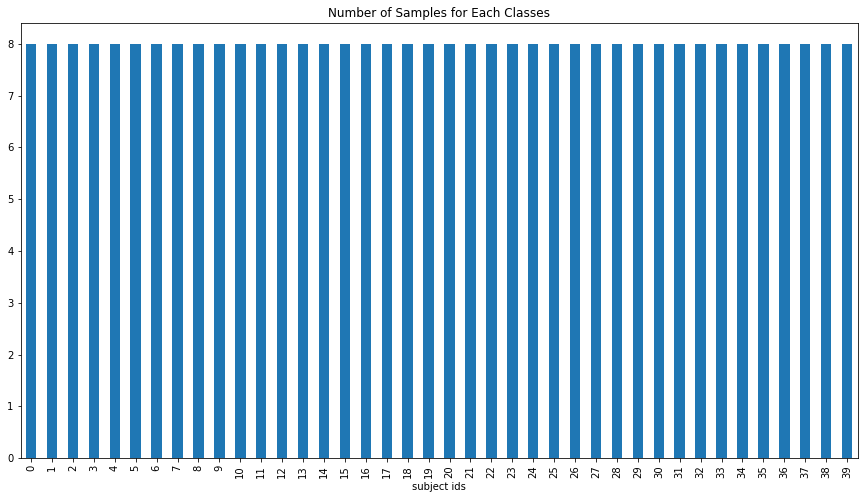

In [11]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

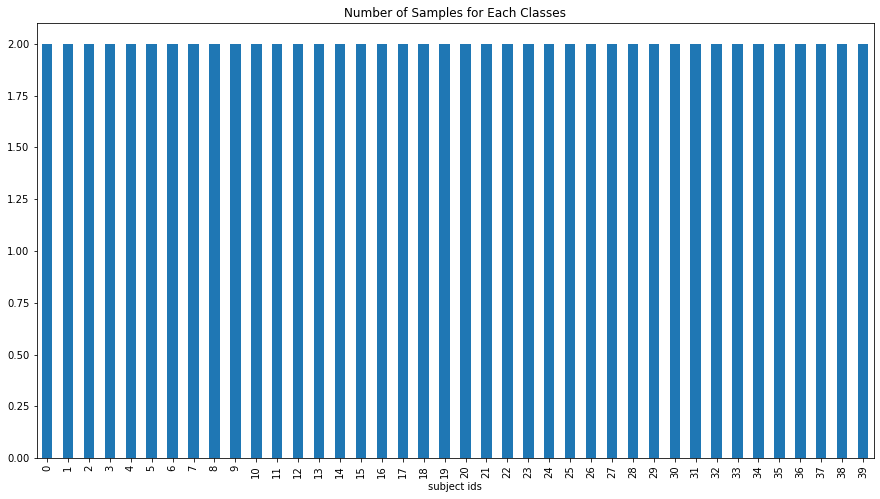

In [12]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

### PCA

In [13]:
from sklearn.decomposition import PCA

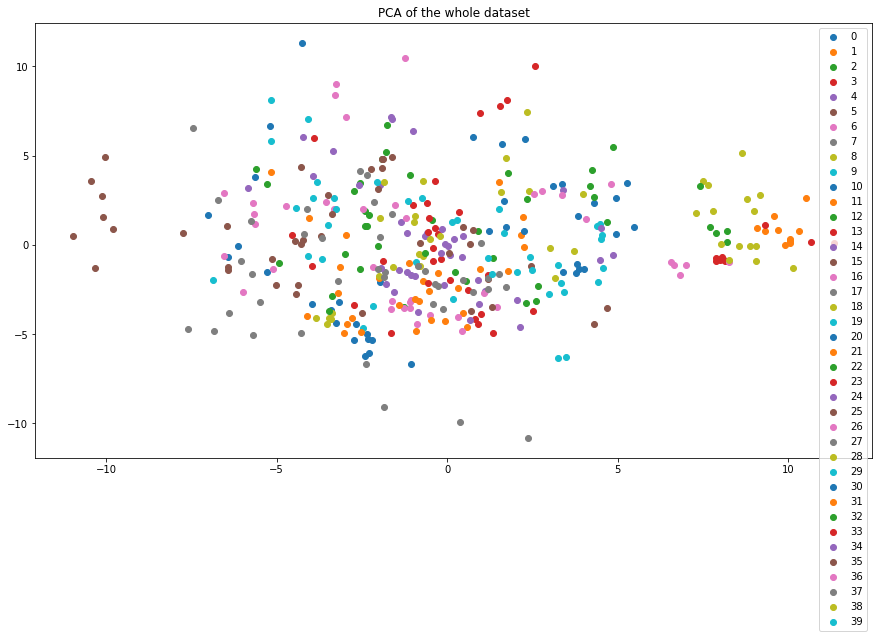

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

In [16]:
pca = PCA(n_components=2)
pca.fit(data)

X_pca = pca.transform(data)

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_pca[target_data == i, 0], X_pca[target_data == i, 1], label=i)
plt.title("PCA of the whole dataset")
plt.legend()
plt.show()

'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''

Finding Optimum Number of Principle Component

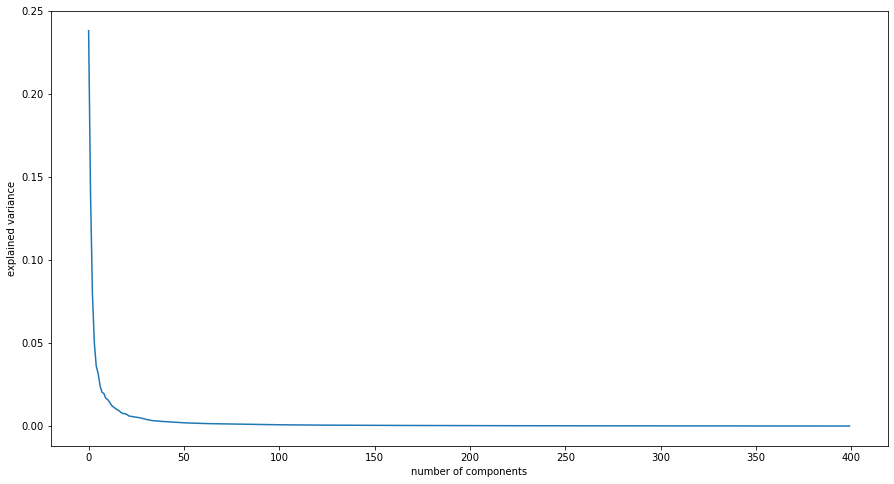

In [17]:
pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

X_train_pca shape: (320, 50)
X_test_pca shape: (80, 50)
0.8787958


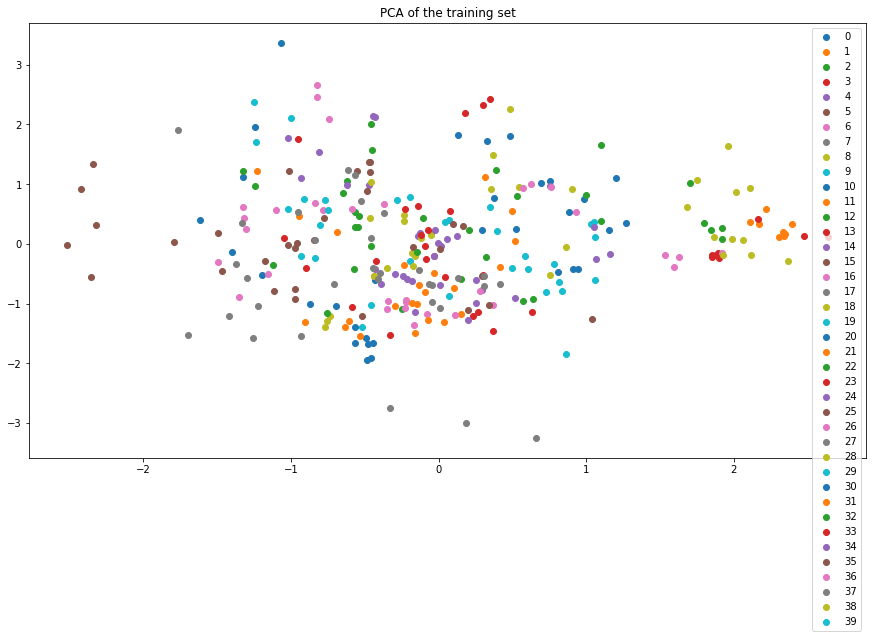

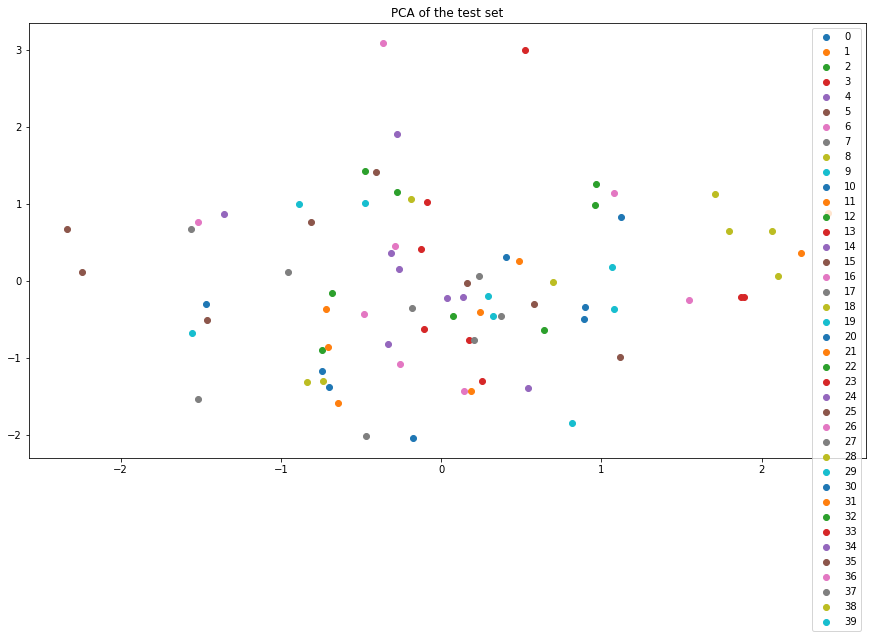

In [18]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")


print(pca.explained_variance_ratio_.sum())


plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show Average Face after PCA

(-0.5, 63.5, 63.5, -0.5)

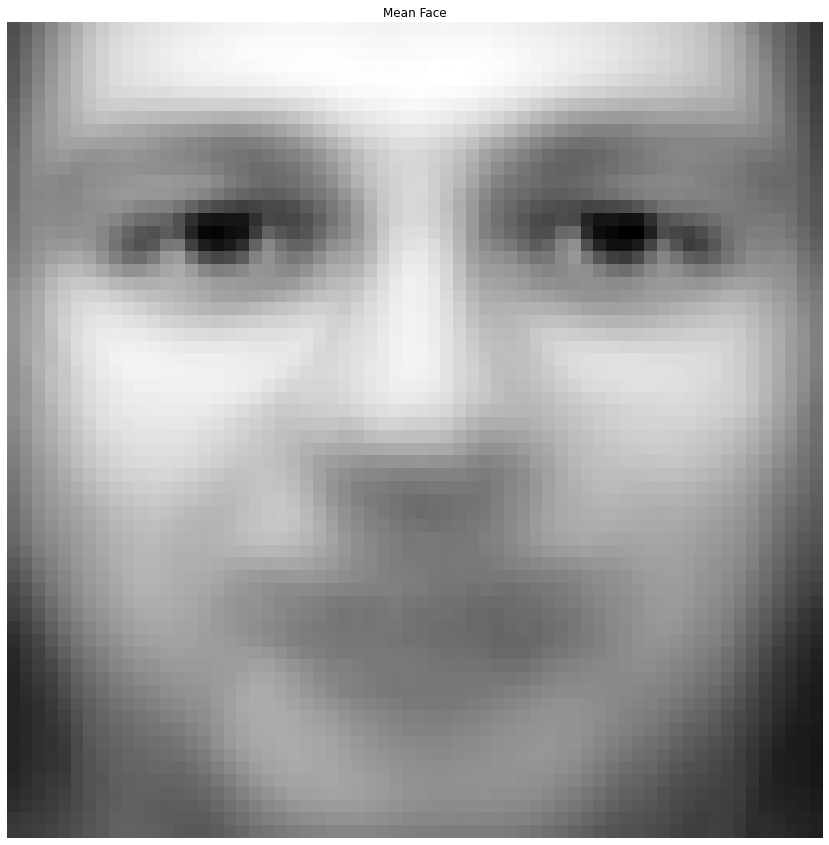

In [19]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title("Mean Face")
ax.axis("off")

Show all faces after PCA

'\neigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))\nprint(number_of_eigenfaces)\nprint(eigen_faces.shape)\nprint(eigen_faces.size)\n\ncols = 10\nrows = int(number_of_eigenfaces / cols)\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\naxarr=axarr.flatten()\nfor i in range(number_of_eigenfaces):\n    print(i)\n    axarr[i].imshow(eigen_faces[i],cmap="gray")\n    axarr[i].set_title("eigen id:{}".format(i))\n'

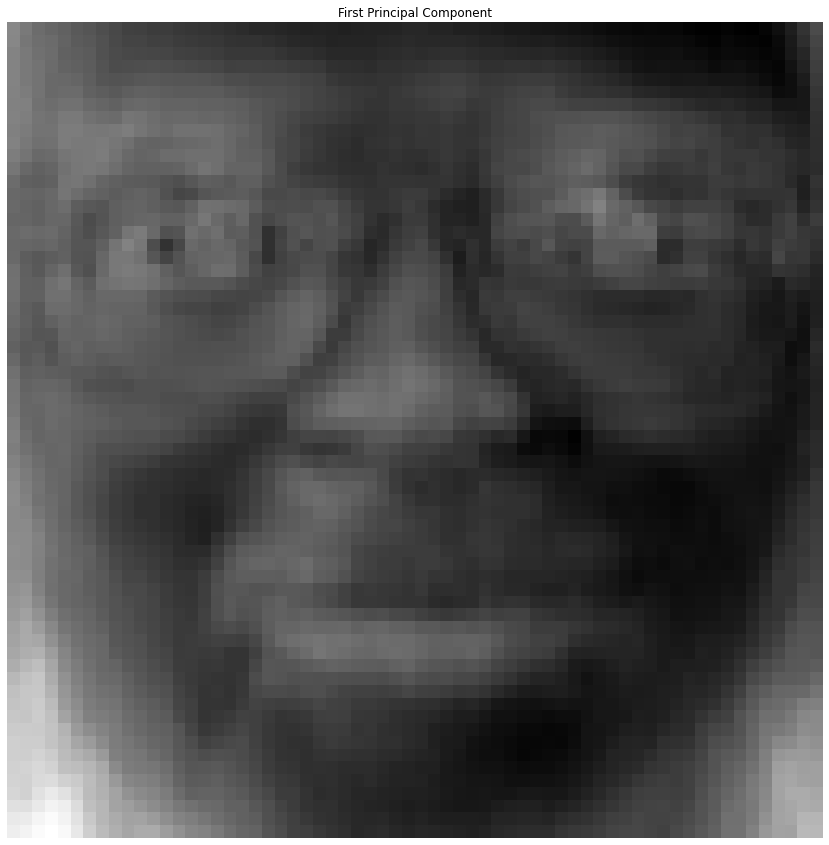

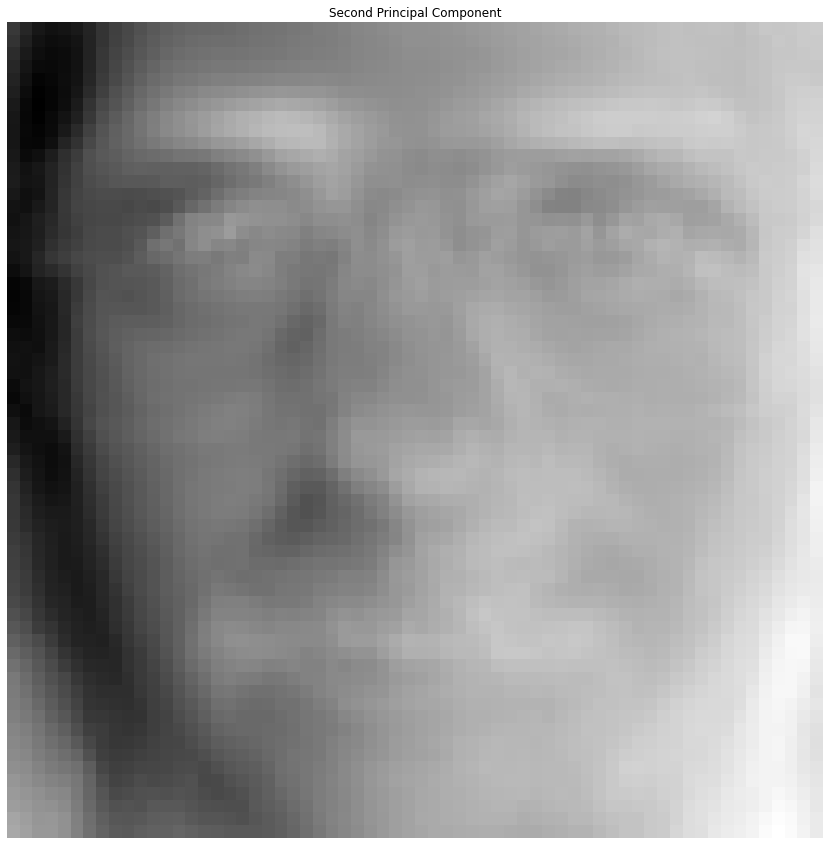

In [20]:
# show all faces after above PCA
number_of_eigenfaces=len(pca.components_)
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[1], cmap="gray")
ax.set_title("Second Principal Component")
ax.axis("off")

'''
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))
print(number_of_eigenfaces)
print(eigen_faces.shape)
print(eigen_faces.size)

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    print(i)
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_title("eigen id:{}".format(i))
'''


### Models

Model training, Model hyper-parameter selection, confusion Matrix

In [21]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, classification_report
import seaborn as sns

def train(model, X_train, X_test, y_train, y_test ):
    print("Training Model: ", model.__class__.__name__)
    model.fit(X_train, np.ravel(y_train))

    #Test Data
    y_pred = model.predict(X_test)
    test_data_acc = accuracy_score(y_test, y_pred)
    print("Accuracy on Test Data: ", test_data_acc)
    cm_test = confusion_matrix(y_test, y_pred)
    
    # Training Data
    y_pred_train = model.predict(X_train)
    train_data_acc = accuracy_score(y_train, y_pred_train)
    print("Accuracy on Train Data: ", train_data_acc)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Plot Confusion Matrix for Test and Train Data
    fig, ax=plt.subplots(1, 2, figsize=(15, 8))
    plt1 = sns.heatmap(cm_test, annot=True, fmt='d', ax=ax[0], cmap="Blues")
    plt1.set_title('Confusion matrix - Test data')
    plt1.set_ylabel('Actual label')
    plt1.set_xlabel('Predicted label')
    
    plt2 = sns.heatmap(cm_train, annot=True, fmt='d', ax=ax[1], cmap="Blues")
    plt2.set_title('Confusion matrix - Train data')
    plt2.set_ylabel('Actual label')
    plt2.set_xlabel('Predicted label')
    plt.show()
    
    # Classification Report
    print("Classification Report for Test Data:")
    for k,v in classification_report(y_test, model.predict(X_test), output_dict=True).items():
       if k == 'weighted avg':
            for i in v:
                print(i, ":", v[i])
    
    print("Classification Report for Training Data:")
    for k,v in classification_report(y_train, model.predict(X_train), output_dict=True).items():
        if k == 'weighted avg':
            for i in v:
                print(i, ":", v[i])
    
def hyper_parameter(hypertuned_model, parameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, parameters, scoring="accuracy")
    model.fit(X_train, np.ravel(y_train))
    print(" Best Params: ", model.best_params_)
    return model.best_params_

def k_fold_cross_validation(model, k , X_train, y_train):
    print("K-Fold Cross Validation for :", model.__class__.__name__)
    kfold = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, np.ravel(y_train), scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def validationCurve(parameter_list, parameter_name, X_train, y_train, model):
    print("Validation Curve for :", model.__class__.__name__)
    train_scores, valid_scores = validation_curve(model, X_train, np.ravel(y_train), param_name = parameter_name, param_range = parameter_list, cv=5, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)

    plt.plot(parameter_list, train_scores_mean, label = "Train", color = 'b')
    plt.plot(parameter_list, test_scores_mean, label = "Cross Validation", color = 'r')
    plt.title("Validation Curve")
    plt.xlabel(parameter_name)
    plt.ylabel("Score")
    plt.legend()
    plt.show()

#### Logistic Regression

Logistic Regression - Base Model
Training Model:  LogisticRegression
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


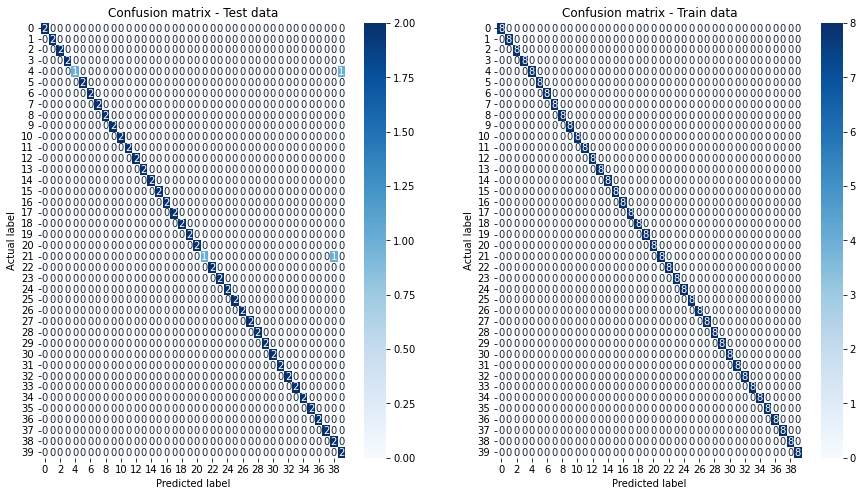

Classification Report for Test Data:
precision : 0.9833333333333334
recall : 0.975
f1-score : 0.9733333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Hyper Parameter Tuning for : LogisticRegression
 Best Params:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Model:  LogisticRegression
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


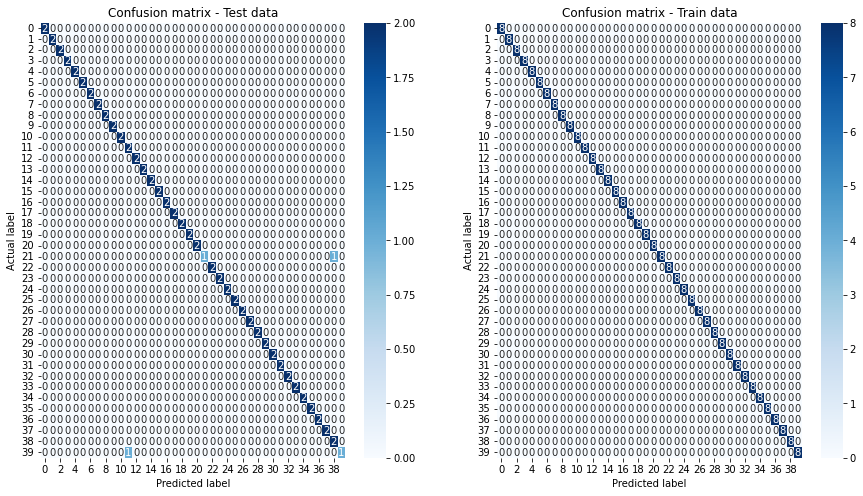

Classification Report for Test Data:
precision : 0.9833333333333332
recall : 0.975
f1-score : 0.9733333333333334
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

K-Fold Cross Validation for : LogisticRegression
Training Model:  LogisticRegression
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


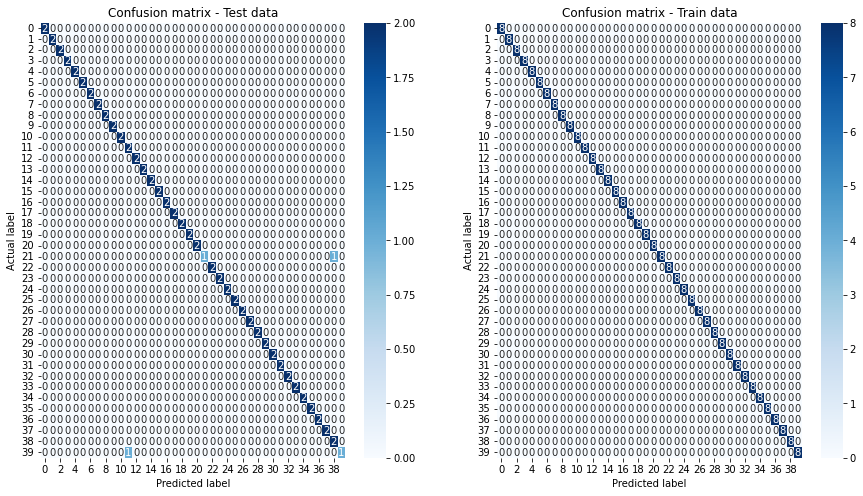

Classification Report for Test Data:
precision : 0.9833333333333332
recall : 0.975
f1-score : 0.9733333333333334
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Validation Curve for : LogisticRegression


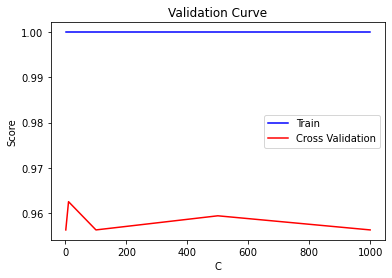

In [35]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

print("Logistic Regression - Base Model")
train(logisticRegression, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionHyperTuned = LogisticRegression()
parameters =  [{'solver': ['liblinear'], 'max_iter': [100, 500, 700], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'], 'penalty': ['l1', 'l2']}]
best_params = hyper_parameter(logisticRegressionHyperTuned, parameters, X_train_pca, y_train)
logisticRegressionHyperTuned.set_params(**best_params)
train(logisticRegressionHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionKfmodel = k_fold_cross_validation(logisticRegressionHyperTuned, 5, X_train_pca, y_train)
train(logisticRegressionKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([1, 10, 100, 500, 1000]), 'C', X_train_pca, y_train, logisticRegressionKfmodel)

#### SVM

SVM - Base Model
Training Model:  SVC
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


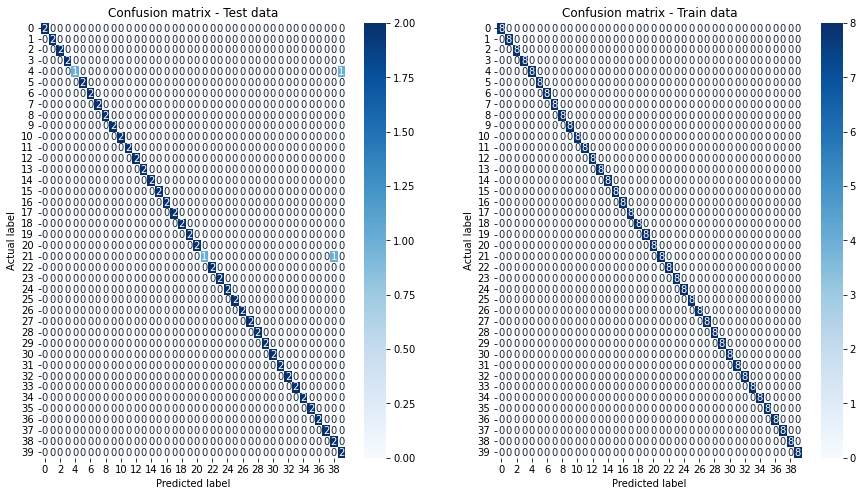

Classification Report for Test Data:
precision : 0.9833333333333334
recall : 0.975
f1-score : 0.9733333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Hyper Parameter Tuning for : SVC
 Best Params:  {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Training Model:  SVC
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


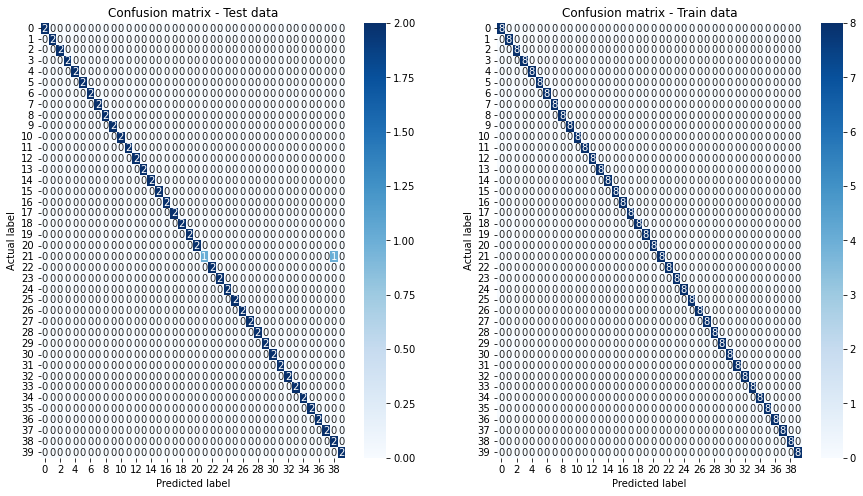

Classification Report for Test Data:
precision : 0.9916666666666668
recall : 0.9875
f1-score : 0.9866666666666667
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

K-Fold Cross Validation for : SVC
Training Model:  SVC
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


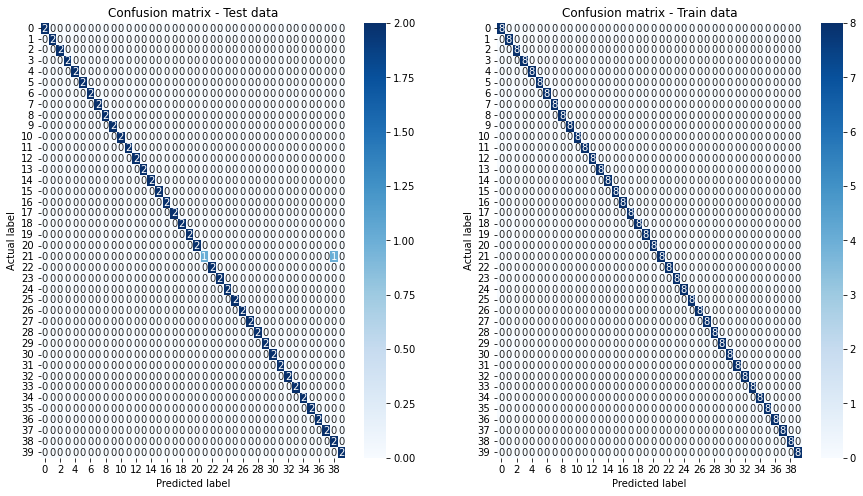

Classification Report for Test Data:
precision : 0.9916666666666668
recall : 0.9875
f1-score : 0.9866666666666667
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Validation Curve for : SVC


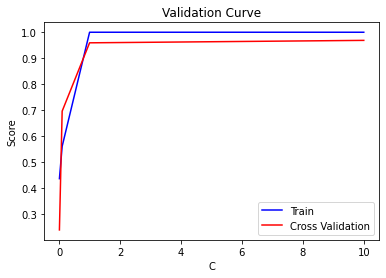

Validation Curve for : SVC


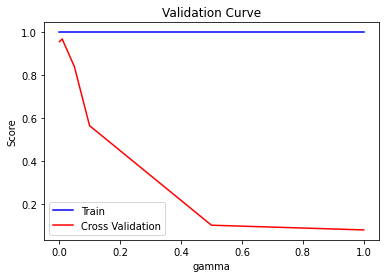

In [38]:
from sklearn.svm import SVC
svc = SVC()

print("SVM - Base Model")
train(svc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcHyperTuned = SVC()
parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1], 'C': [0.01, 0.1, 1, 10, 50, 75, 100, 250, 500, 750, 1000], 'class_weight': ['balanced']}]
best_params = hyper_parameter(svcHyperTuned, parameters, X_train_pca, y_train)
svcHyperTuned.set_params(**best_params)
train(svcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcKfmodel = k_fold_cross_validation(svcHyperTuned, 5, X_train_pca, y_train)
train(svcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.01, 0.1, 1, 10]), "C", X_train_pca, y_train, svcKfmodel)
validationCurve(np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1]), "gamma", X_train_pca, y_train, svcKfmodel)

#### Gaussian Naive Bayes

Gaussian Naive Bayes - Base Model
Training Model:  GaussianNB
Accuracy on Test Data:  0.9
Accuracy on Train Data:  1.0


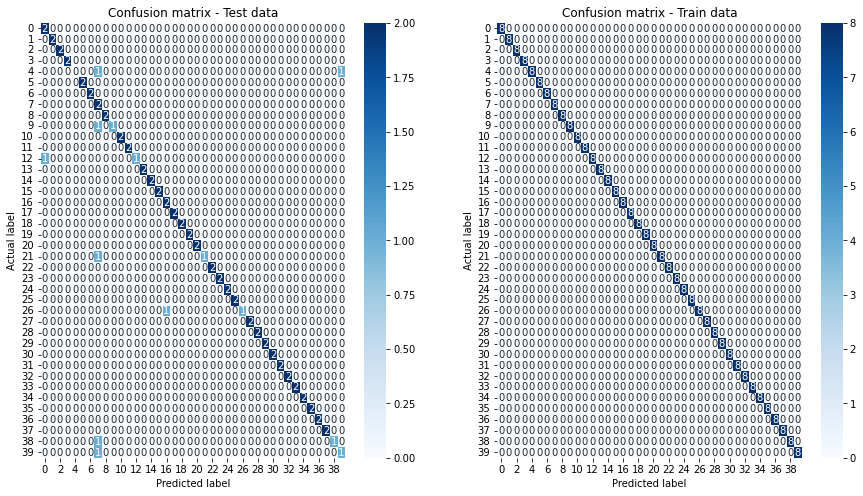

Classification Report for Test Data:
precision : 0.9279761904761905
recall : 0.9
f1-score : 0.8969444444444443
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Hyper Parameter Tuning for : GaussianNB


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Best Params:  {'var_smoothing': 0.533669923120631}
Training Model:  GaussianNB
Accuracy on Test Data:  0.925
Accuracy on Train Data:  1.0


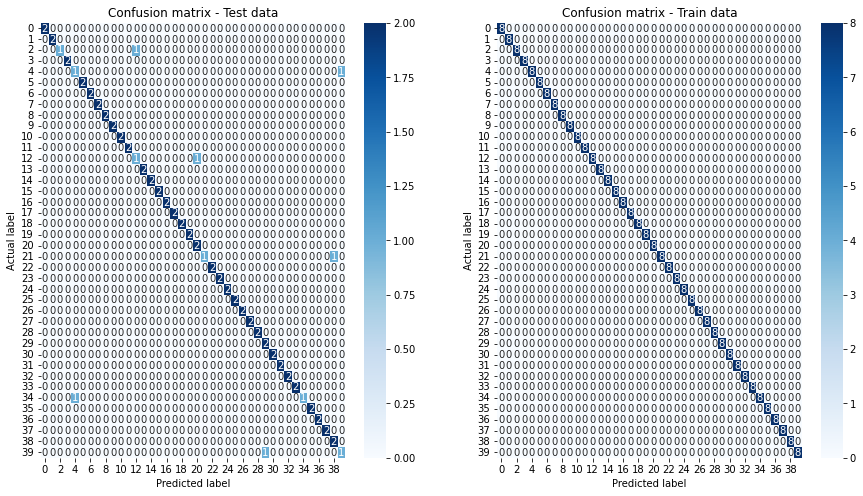

Classification Report for Test Data:
precision : 0.9375
recall : 0.925
f1-score : 0.9225
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

K-Fold Cross Validation for : GaussianNB
Training Model:  GaussianNB
Accuracy on Test Data:  0.925
Accuracy on Train Data:  1.0


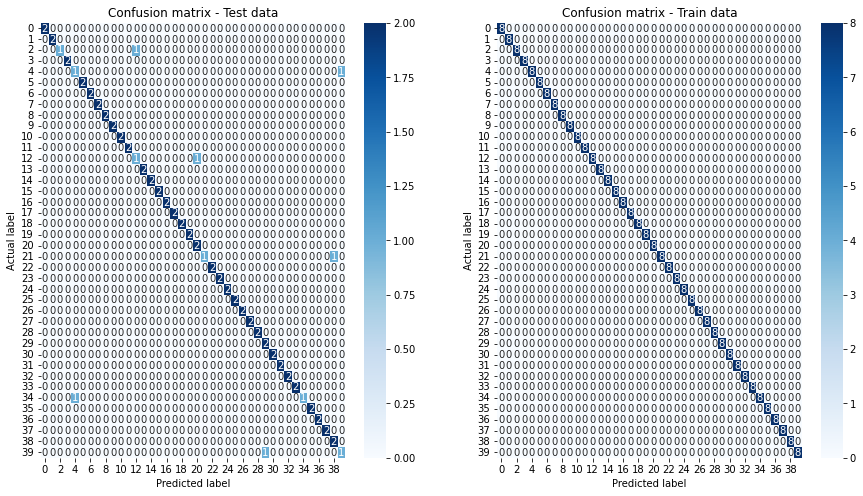

Classification Report for Test Data:
precision : 0.9375
recall : 0.925
f1-score : 0.9225
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Validation Curve for : GaussianNB


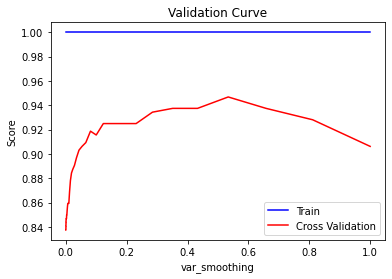

In [37]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()

print("Gaussian Naive Bayes - Base Model")
train(gaussianNB, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBHyperTuned = GaussianNB()
parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}]
best_params = hyper_parameter(gaussianNBHyperTuned, parameters, X_train_pca, y_train)
gaussianNBHyperTuned.set_params(**best_params)
train(gaussianNBHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBKfmodel = k_fold_cross_validation(gaussianNBHyperTuned, 5, X_train_pca, y_train)
train(gaussianNBKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.logspace(0,-9, num=100), "var_smoothing", X_train_pca, y_train, gaussianNBKfmodel)

#### Decision Tree

Decision Tree Classifier - Base Model
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.6125
Accuracy on Train Data:  1.0


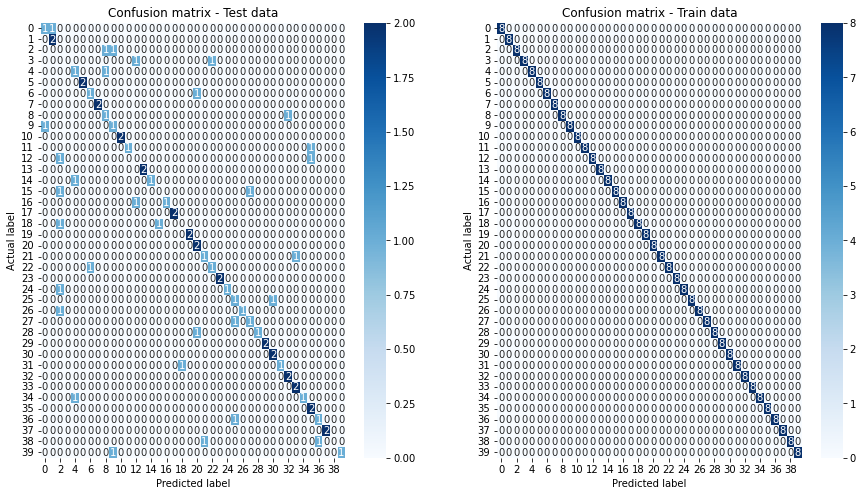

Classification Report for Test Data:
precision : 0.65
recall : 0.6125
f1-score : 0.6033333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Hyper Parameter Tuning for : DecisionTreeClassifier


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Best Params:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.6625
Accuracy on Train Data:  0.94375


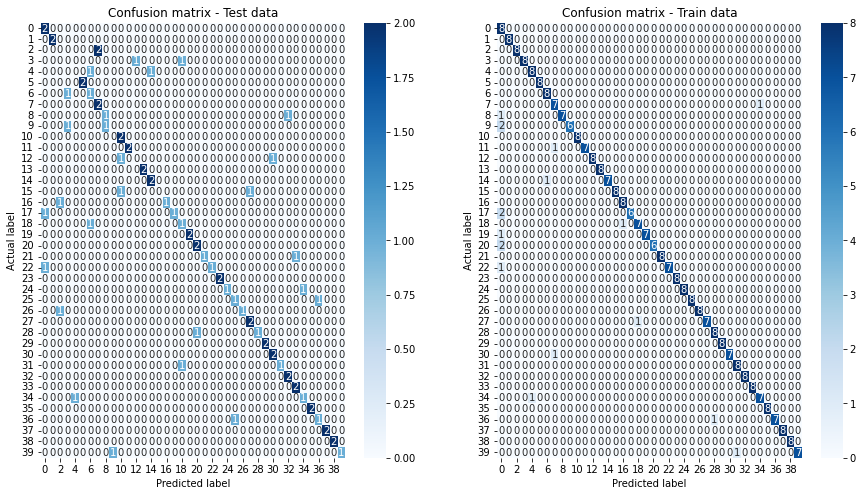

Classification Report for Test Data:
precision : 0.6791666666666666
recall : 0.6625
f1-score : 0.64
support : 80
Classification Report for Training Data:
precision : 0.9610702614379086
recall : 0.94375
f1-score : 0.9472710084033613
support : 320
#############################

K-Fold Cross Validation for : DecisionTreeClassifier
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.65
Accuracy on Train Data:  0.94375


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


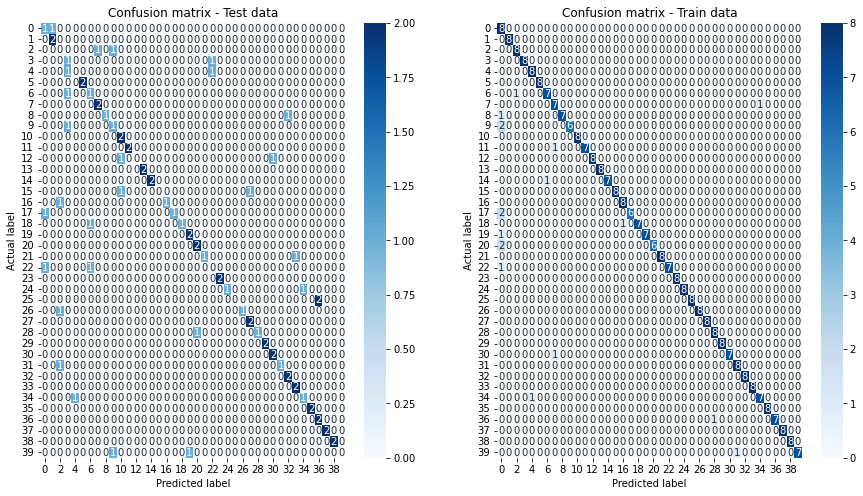

Classification Report for Test Data:
precision : 0.6520833333333333
recall : 0.65
f1-score : 0.6191666666666666
support : 80
Classification Report for Training Data:
precision : 0.9610702614379084
recall : 0.94375
f1-score : 0.9472710084033615
support : 320
#############################

Validation Curve for : DecisionTreeClassifier


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Invalid parameter n_neighbors for estimator DecisionTreeClassifier(max_depth=15, min_samples_split=3). Check the list of available parameters with `estimator.get_params().keys()`.

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

print("Decision Tree Classifier - Base Model")
train(dtc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcHyperTuned = DecisionTreeClassifier()
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
best_parameters = hyper_parameter(dtcHyperTuned, parameters, X_train_pca, y_train)
dtcHyperTuned.set_params(**best_parameters)
train(dtcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcKfmodel = k_fold_cross_validation(dtcHyperTuned, 5, X_train_pca, y_train)
train(dtcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]), "max_depth", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_split", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_leaf", X_train_pca, y_train, dtcKfmodel)

#### k-Nearest Neighbor (k-NN) classifier

KNN - Base Model
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.9125
Accuracy on Train Data:  0.965625


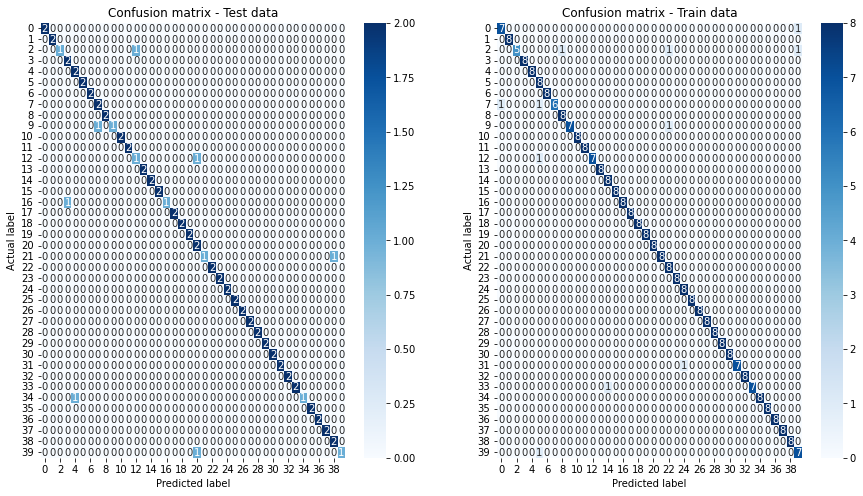

Classification Report for Test Data:
precision : 0.9416666666666667
recall : 0.9125
f1-score : 0.9091666666666665
support : 80
Classification Report for Training Data:
precision : 0.9711679292929294
recall : 0.965625
f1-score : 0.9653189983820788
support : 320
#############################

Hyper Parameter Tuning for : KNeighborsClassifier
 Best Params:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.9
Accuracy on Train Data:  1.0


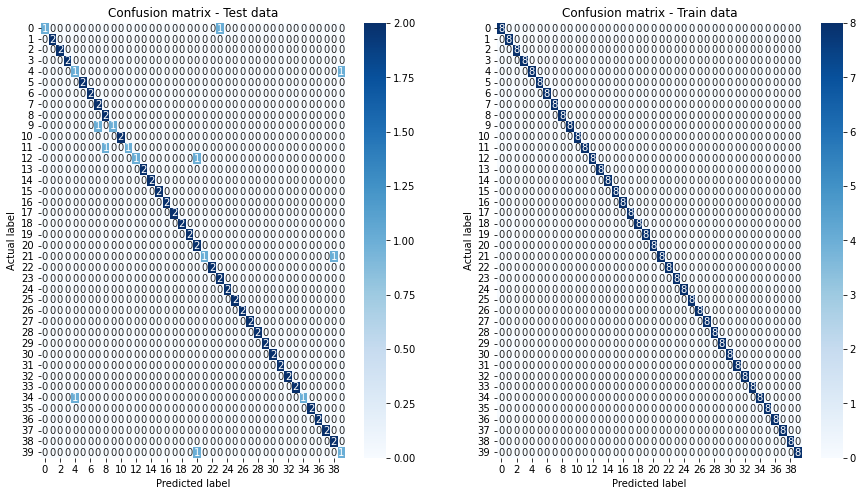

Classification Report for Test Data:
precision : 0.9291666666666666
recall : 0.9
f1-score : 0.8966666666666665
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

K-Fold Cross Validation for : KNeighborsClassifier
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.9
Accuracy on Train Data:  1.0


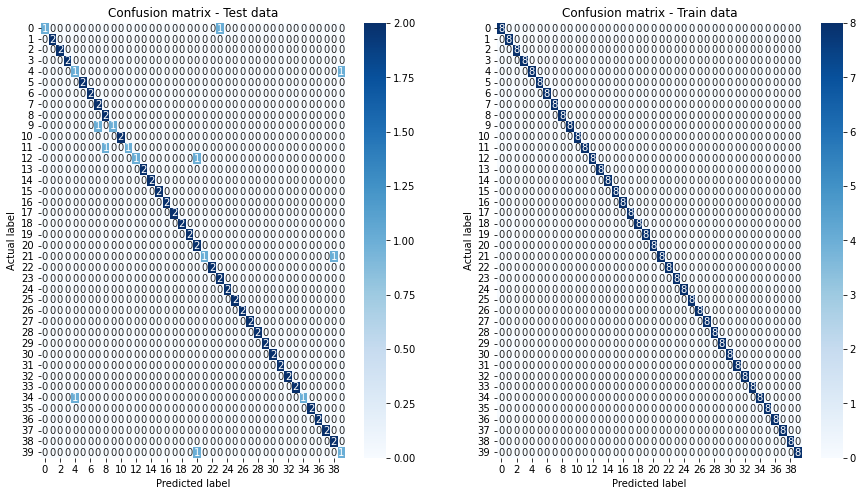

Classification Report for Test Data:
precision : 0.9291666666666666
recall : 0.9
f1-score : 0.8966666666666665
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Validation Curve for : KNeighborsClassifier


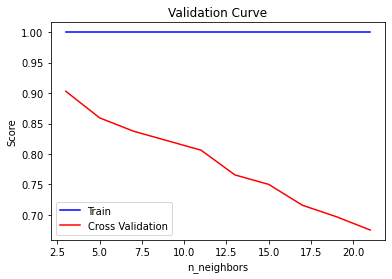

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print("KNN - Base Model")
train(knn, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnHyperTuned = KNeighborsClassifier()
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
best_parameters = hyper_parameter(knnHyperTuned, parameters, X_train_pca, y_train)
knnHyperTuned.set_params(**best_parameters)
train(knnHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnKfmodel = k_fold_cross_validation(knnHyperTuned, 5, X_train_pca, y_train)
train(knnKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21]), "n_neighbors", X_train_pca, y_train, knnKfmodel)

#### Linear Discriminant Analysis

Linear Discriminant Analysis - Base Model
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


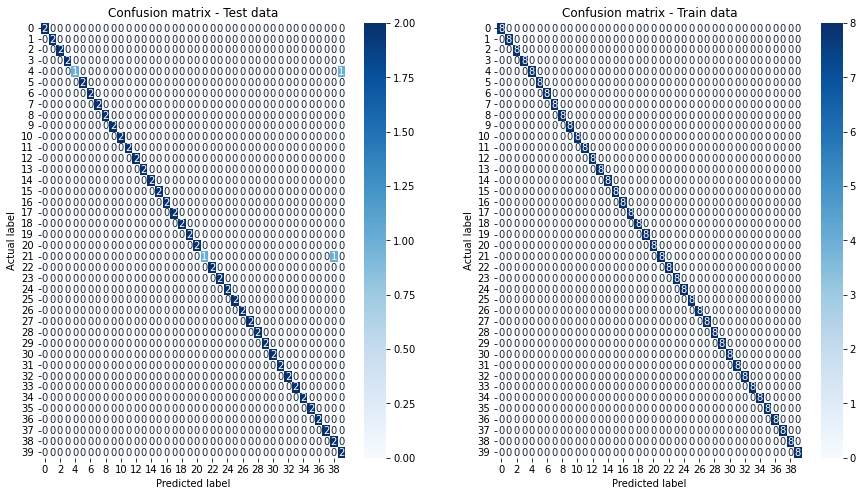

Classification Report for Test Data:
precision : 0.9833333333333334
recall : 0.975
f1-score : 0.9733333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Hyper Parameter Tuning for : LinearDiscriminantAnalysis


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/home/eva/anaconda3/lib/python3

 Best Params:  {'shrinkage': None, 'solver': 'svd'}
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


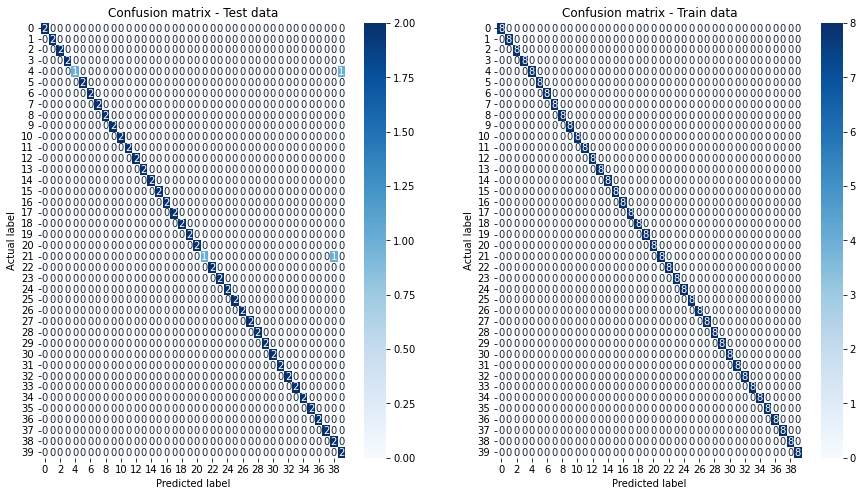

Classification Report for Test Data:
precision : 0.9833333333333334
recall : 0.975
f1-score : 0.9733333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

K-Fold Cross Validation for : LinearDiscriminantAnalysis
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.975
Accuracy on Train Data:  1.0


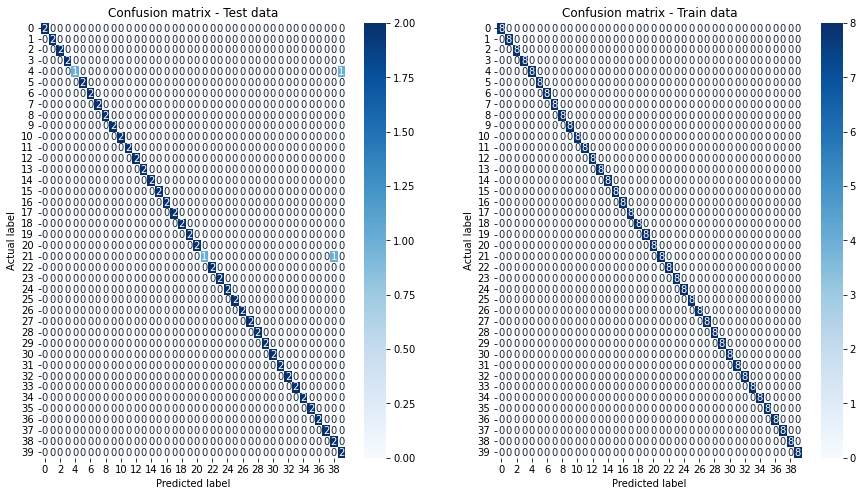

Classification Report for Test Data:
precision : 0.9833333333333334
recall : 0.975
f1-score : 0.9733333333333333
support : 80
Classification Report for Training Data:
precision : 1.0
recall : 1.0
f1-score : 1.0
support : 320
#############################

Validation Curve for : LinearDiscriminantAnalysis


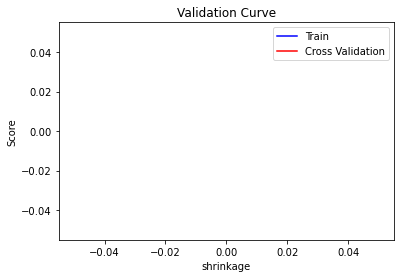

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

print("Linear Discriminant Analysis - Base Model")
train(lda, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldsHyperTuned = LinearDiscriminantAnalysis()
parameters = {'solver':('svd', 'lsqr', 'eigen'), 'shrinkage':[None, 'auto']}
best_lds_params = hyper_parameter(ldsHyperTuned, parameters, X_train_pca, y_train)
ldsHyperTuned.set_params(**best_lds_params)
train(ldsHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldaKfmodel = k_fold_cross_validation(ldsHyperTuned, 5, X_train_pca, y_train)
train(ldaKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]), "shrinkage", X_train_pca, y_train, ldaKfmodel)

### D

In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

model.evaluate(X_test, y_test)


Epoch 1/3


ValueError: in user code:

    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_12" (type Sequential).
    
    Input 0 of layer "conv2d_12" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (32, 4096)
    
    Call arguments received by layer "sequential_12" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 4096), dtype=float32)
      • training=True
      • mask=None
